In [1]:
import gensim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from os import listdir
from os.path import isfile, join
from tqdm.notebook import tqdm
import re
import nltk
import pickle
import swifter
import random

unable to import 'smart_open.gcs', disabling that module


In [2]:
dramas = [f for f in listdir('drama/') if isfile(join('drama/', f))]
dramas_texts = []


for drama in dramas:
    with open(join('drama/', drama), 'rb') as f:
        dramas_texts.append(pickle.load(f))

dramas_texts[0][0][:5]

[('Григорий', 'Ступай отвори дверь! звонят!'),
 ('Петр',
  'Да ты что сидишь? На ногах у тебя пузыри, что ли? встать не можешь?'),
 ('Иван', 'Ну, уж я пойду, так и быть, отворю! Это Андрюшка!'),
 ('Григорий', 'А, московская ворона! Откуда тебя принесло?'),
 ('Чужой слуга',
  'Ах ты, чухонский сын! Побегал бы ты с мое. Вот к цветочнице велела снесть, что на Петербургской. Небось четвертака на извозчика не\n            даст. Да и к вашему тож. Что, спит?')]

In [3]:
model = gensim.models.KeyedVectors.load('araneum_none_fasttextcbow_300_5_2018/araneum_none_fasttextcbow_300_5_2018.model')

In [4]:
only_sents = []

for drama in tqdm(dramas_texts):
    for part in drama:
        only_sents = only_sents + [sent for _, sent in part]
        
only_sents[:5]

['Ступай отвори дверь! звонят!',
 'Да ты что сидишь? На ногах у тебя пузыри, что ли? встать не можешь?',
 'Ну, уж я пойду, так и быть, отворю! Это Андрюшка!',
 'А, московская ворона! Откуда тебя принесло?',
 'Ах ты, чухонский сын! Побегал бы ты с мое. Вот к цветочнице велела снесть, что на Петербургской. Небось четвертака на извозчика не\n            даст. Да и к вашему тож. Что, спит?']

In [5]:
only_sents_splited = []

for text in tqdm(only_sents):
    only_sents_splited.extend(nltk.sent_tokenize(re.sub('[\n]', ' ', text)))
    
only_sents_splited[:5]

['Ступай отвори дверь!',
 'звонят!',
 'Да ты что сидишь?',
 'На ногах у тебя пузыри, что ли?',
 'встать не можешь?']

In [6]:
only_sents_vectors = []

for sent in tqdm(only_sents_splited):
    only_sents_vectors.append(np.mean([model.get_vector(word) for word in nltk.word_tokenize(sent)], axis=0))
    
    
    
# with open('araneum_fullsplited_vectors.pkl', 'wb') as f:
#     pickle.dump(zip(only_sents_splited, only_sents_vectors), f)
    
# only_sents_vectors_pooler[:1]

In [7]:
sents_vectors = list(zip(only_sents_splited, only_sents_vectors))

In [8]:
# Vecs_train, Vecs_test = train_test_split(only_sents_vectors, test_size=0.5, random_state=42)

clust_model_kmeans = KMeans(n_clusters=50, random_state=42, precompute_distances=True)
clust_model_kmeans.fit(only_sents_vectors)
clusters = clust_model_kmeans.predict(only_sents_vectors)

KeyboardInterrupt: 

In [ ]:
sents_with_clusters = list(zip([sent for sent, _ in sents_vectors], clusters))

In [98]:
# cluster_names = {}

for curr_cluster in sorted(list(set(clusters))):
    if curr_cluster not in cluster_names:
        print(curr_cluster)
        sents_in_this_cluster = [sent for sent, cluster in sents_with_clusters if cluster==curr_cluster]
        for sent in random.choices(sents_in_this_cluster, k=20):
            print(sent)
        cluster_names[curr_cluster] = input()
        print('=========================\n=========================\n=========================\n\n\n')
cluster_names   

125
Вить ныне все по-новому: преж сего любилися ради               сластолюбия, а ныне ради тщеславия больше.
Боярам честь потом, а немцам прежде.
Какая такая честь?
Людей боготворит едина только лесть; Несходны должности — и различная честь, Определенная достоинству награда.
Чтобы это людям известно было и чтобы слава твоя простиралась.
Я думаю: какой продавший честь Клейменный каторжник, забывший совесть, Сторожевым о принце мог донесть?
(Имею честь                 приветствовать вас, сударыня, ваше высочество!
Лишь обязательство любить прямую честь.
Ах, благодетельница!
Постойте, ради Бога!
Слава богу, слава богу.
отечества отрада!
Сей храброю рукой Спаслось отечество и дан Москве покой.
Тише, ради бога, тише!
Имею честь поздравить вас, ваше высокоблагородие, и пожелать благоденствия на многие               лета!
- А эта лишня честь Великий может вред обоим им принесть.
Уж когда               торжество, так торжество!
Сударыня... как благодарить мне вас за ту честь... которую я имел

Вопрос/утверждение/рассуждение (что)



137
Вы             великая музыкантша.
Из наслаждений жизни Одной любви музыка уступает; Но и любовь мелодия... взгляни: Сам Карлос тронут, твой угрюмый гость.
Почтеннейшая публика!
Как новый вальс хорош!
Замечательный художник.
Ну скажите: похож автор комедии на этот портрет?
А стихотворец?
Ах... чертова кукла!
Почтеннейшая публика!
О рок ожесточенный!
особливо вальс.
Обезображивать великое искусство!
Славная песня!
А колорит?
Посмотрим, что говорит русский роман.
Он был щеголь, веселый!
Значит, вечером будет спектакль.
Почтеннейшая публика!
Жестокий рок...
Где гитара моя?
Искусству



138
Сегодняшний денечек Послал-таки господь сот с лишком на пяточек Мне аксиденции.
Вотчим ведь ей.
Не сим есть праведных наполнен ум царей: Царь мудрый есть пример всей области своей, Он правду паче всех подвластных наблюдает И все свои на ней уставы созидает, То помня завсегда, что краток смертных век, Что он в величестве такой же человек.
Супруг Годмилы твой дн

Любовь/страсть



146
Что тяжеле: ждать и не дождаться или иметь               и потерять?
С тоски пошел рядиться.
Изволь голос подавать.
Есть чем похвастаться!
Неужели вы будете раскаиваться?
"Прощать, прощать"!
Чего мне ждать?
Счастливо               оставаться!
Вы обещали дать ему...
Нет, зачем беспокоить!
а не               выручать.
А что сыграть?
Какие вести?
а после — хвать!..
По какому городу бегать, про каких кавалеров разыскивать?
Что поправлять?
Надобно его помиловать.
А то еще дело заводить,               путаться.
Нельзя статься!
Будем служить тебе!
Потеря/прощение/тоска



147
Любовь слово большое.
Ну, скажи мне хоть слово?
И я               сдержу свое слово.
Федя, дай слово, что исполнишь!
Ну, дай             честное слово, что исполнишь!
Иль слово твой родитель...
Вот оно какое слово -- сваха.
На что ж ты слово дал?
Честное слово.
Честное слово, при всех скажу.
Эта фраза чрезвычайно мила.
А к чему какое слово сказано.
Это ваше последнее слово?
Капитанское слово, не отс

Обращение к девушке



155
О солнце!
А малый без ума, и белый свет немил!
Помешался словно ты.
Над морем краснеет заря.
От которого она и на тот свет пошла.
В летний зной прохлада и отдохновение членам.
О небо!
О небо!
Я должна удаляться от света.
Это рассвет десятого!
Но, ах, уже минут оставших ненавижу И только для того могу на свет глядеть, Что, видя свет, могу тебя на свете зреть.
О небо, отврати свирепого убивца И сокрушить не дай тем сердца моего!
Какая тоска!
Ты знаешь, ремеслом таким весь свет торгует.
Какая тишина!
О тень обожаемой мною               супруги!
Уж это что за живопись, когда Кухарками он населяет небо!
Часики фарфоровые белые с цветочками... Когда на них солнце, то в цветочках веселие               райское...
На небе над Парижем весною сиреневый отсвет,               точь-в-точь такой.
Сначала выключат свет, потом начнется ад.
Пейзаж/описание



156
А кормить-то вас кто будет?
Я... Я люблю вас!
А у вас много денег-с?
Позвольте вас спросить.
Любить вас приказать.


К времени/сожалению/несчастью/персонажу



165
В твою опочивальню Проникла с треском молонья – и разом Дворец вспылал.
Слышь, – не кричи!
Человек – не верит... Должна, говорит, быть... ищи лучше!
Опричнину ж ты снова ль учредишь Иль будешь всей землею государить – В твоей то воле – ты рассудишь сам, Как то тебе и брату прибыльнее, А образец вам учинен готов.
От судьбы – не уйдешь... Полиция!
– Бабы, стыдно.
Я завсегда могу быть перед господами чиновниками, – что               вы?
Это так, ну, а – паспорт имеешь?
Может быть, – и, кажется, без спора Графинею твоя задача решена.
Это мне – не по силам.
Мне недолго Осталось жить – я должен умереть – И срок уж мне назначен.
– Легкое дело... что ты несешь!
В любимом – вся душа...
Что-то, Николаша, другое, а               что – не понимаю!
В этом – все начала и концы... Всё – в человеке, всё для             человека!
Кто сказал – ложь?
Ты везде лишняя... да и все люди на земле – лишние...
Отец Павлин – против революции и за войну, а я – против

Просьба



175
Разве мне чужих-то жалко?
Очень рад познакомиться.
Ну, милый Высонос!
Невинная погибла — жаль!
Ах, ей-богу, как это приятно!
Глупо, мой милый!
По твоей милости, милый Пабло.
но жаль лишиться чести!
Очень рад!
Вот здорово.
Я так рад.
Нет, приятно.
Как жаль!
Очень рад вас видеть.
Перестань, милый!
Все сели, очень рад!
Вам весело?
Просится душа к тебе и к людям; и палат лесных безмолвных жаль, жаль зверей моих, жаль тихих дум...
Очень рад!
А ведь жаль мадам Купавину, плакать будет.
Эмоции (радость/слезы)



176
наказания               ждать и молчать!!
Как можно эдак спать?
Чего тут стыдиться?
Из-за чего теперь ссориться?
Мы будем играть и               пить.
Позвольте ручку поцеловать.
и век шутить!
Зачем пить?
За что обижать?
Волка бояться, в лес не ходить!
Геннадия Демьяныча чай кушать дожидаться не станете?
Зачем же бросать!
Так, поглядеть.
Чего будить?
На меня смотреть!
Вперед будем спрашиваться.
Волка бояться - в лес не ходить.
что пользы проклинать?
Зачем клясться?
Г

Прерывание (постой)



190
Я мельник.
От всех купцов, лабазников, ткачей, И шорников, и мясников, которых Привел с собой князь Шуйский!
Бедный мельник!Бедный мельник!
Послушайте, Бальзаминов, это вы-то генерал?
Идем, товарищ.
Я титулярный советник.
Господин капитан!
Так, это портрет сестрин!
Ах, мосье!
фельдмаршал из лгунов!
уж нас за графов принимают!
педант, несносное творенье!
и вы уезжаете, доктор?
Хоть, мошет видели, здесь полицмейстер пыл?
Нехорошо, ротмистр.
Спасибо, шурин.
а когда генерал, то уж               разве сам генералиссимус.
Довел на вас ваш казначей Бортенев.
Его сиятельство вас сердит мастерски!
Нет, королевич.
Работы



191
Побил немножко, да и то маменька приказала.
Проводили, дяденька; вы немножко не застали его.
Ну, ладно, ладно, не горячись.
Хорош, ладно.
Чихнул, так               дома чуть-чуть не опрокинул.
Так... немножко.
Какой хорошенький!
Ну, ладно.
Поищи хорошенько!
Да подумайте хорошенько!
Останемся... Побудем здесь немного.
Постой хоть немного перед на

{0: 'Дом/жизнь',
 1: 'Вопрос: уточнение личности',
 2: 'Эмоциональное восклицание',
 3: 'Эмоциональное восклицание',
 4: 'Брак',
 5: 'Описание (и обращение ласковый)',
 6: 'Эмоциональное восклицание',
 7: 'Эмоциональное восклицание',
 8: 'Оправдания',
 9: 'Эмоциональное восклицание',
 10: 'Статус',
 11: 'Согласие/описание (слово хорошо)',
 12: 'Смех',
 13: 'Рассуждения',
 14: 'Эмоциональное восклицание',
 15: 'Эмоциональное восклицание (вздор)',
 16: 'Отрицание (не знаю)',
 17: 'Религия/закон',
 18: '-',
 19: 'Эмоциональное восклицание/ денежные средства',
 20: 'Брак/дети',
 21: 'Отношения/будущий разговор',
 22: 'Короткий ответ (сударь/сударыня)',
 23: 'Ответ/начало ответа',
 24: 'Эмоциональное восклицание',
 25: 'Обращение',
 26: 'Грустное восклицание о жизни',
 27: 'О себе (Эмоциональное восклицание)',
 28: 'Перемещения (слово сюда)',
 29: 'Эмоциональное восклицание',
 30: 'Преступления/брак/быт',
 31: 'Отрицательный вопрос/ответ',
 32: 'Деньги/статус',
 33: 'Междометия',
 34: 'Вопр

In [111]:
cluster_lens = {}

for curr_cluster in sorted(list(set(clusters))):
    sents_in_this_cluster = [sent for sent, cluster in sents_with_clusters if cluster==curr_cluster]
    cluster_lens[curr_cluster] = len(sents_in_this_cluster)

In [116]:
for curr_cluster in sorted(list(set(clusters))):
    if curr_cluster in  [24]:
        print(curr_cluster)
        sents_in_this_cluster = [sent for sent, cluster in sents_with_clusters if cluster==curr_cluster]
        for sent in random.choices(sents_in_this_cluster, k=20):
            print(sent)
        cluster_names[curr_cluster] = input()
        print('=========================\n=========================\n=========================\n\n\n')
cluster_names   

24
Похож!
Он корону примет.
Каюсь!..
- "Та!"
Похож!
Виноват-с!
Ой!
Продолжай, продолжай!
Идём!
!
О!
Он!
Не божись, а лучше договор Мы сделаем с тобой.
Поди-тко-сь!
Фи!
Ого!
Ах!
получит!
О!
Ха!


KeyboardInterrupt: 

In [ ]:
def cluster_text(per_text, model, cluster_model, cluster_names={}):
    output = []
    all_clusters = []
    for person, text in per_text:
        sents = {sent: -1 for sent in nltk.sent_tokenize(re.sub('[\n]', ' ', text))}
        for sent in sents:
            words = nltk.word_tokenize(sent)
            words_vectors = [model.get_vector(word) for word in words]
            vector = np.mean(words_vectors, axis=0)
            cluster = cluster_model.predict([vector])
            sents[sent] = str(cluster[0]) + ' ' + cluster_names.get(cluster[0], '-')
            all_clusters.append(cluster[0])
#         print('{}: {}'.format(person, sents))
        output.append((person, sents))
    return output, all_clusters

parsed_text, _ = cluster_text(dramas_texts[201][2], model, clust_model_kmeans)

for person, rep in parsed_text:
    print(person)
    for phrase in rep:
        print(phrase + ': ' + colored(rep[phrase], 'red'))
    print('\n')

In [119]:
# with open('araneum200clust_cluster_model', 'wb') as file:
#     pickle.dump(clust_model_kmeans, file)
    
# with open('araneum200clust_cluster_names', 'wb') as file:
#     pickle.dump(cluster_names, file)

In [ ]:
def list_of_clusters_to_vec(clusters, n=200):
    output = [0] * n
    for clust in clusters:
        output[clust] = output[clust] + 1
    return output

def list_of_clusters_to_vec_2(clusters, clust_to_vec):
    if len(clusters) > 0:
        return np.mean([clust_to_vec[clust] for clust in clusters], axis=0)
    else:
        return np.array([0] * len(clust_to_vec['0']))

In [517]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drama2vec = []
dramas_names = []
cluster_vecs = []

for i, drama in tqdm(enumerate(dramas)):
    for part_num, part in enumerate(dramas_texts[i]):
        dramas_names.append(drama.split('.')[0] + '_{}_{}_{}'.format(i, part_num, len(part)))
        _, clusters = cluster_text(part, model, clust_model_kmeans, cluster_names)
#         drama2vec.append(list_of_clusters_to_vec_2(clusters, clust_to_vec))
#         if len(clusters) > 0:
        drama2vec.append(list_of_clusters_to_vec_2([str(clust) for clust in clusters], embs))
#         cluster_vecs.append(clusters)

In [655]:
drama2vec[0]

array([ 0.31168178, -0.36785838], dtype=float32)

In [656]:
from sklearn.metrics import pairwise_distances

cos_dis = pairwise_distances(drama2vec, drama2vec, metric='euclidean')

In [657]:
dis_dict = {dramas_names[i]: dis for i, dis in enumerate(cos_dis[172])}
{k: v for k, v in sorted(dis_dict.items(), key=lambda item: item[1])}

{'nekrasov-akter_9_8_5': 0.0,
 'tolstoy-zhivoy-trup_89_24_7': 0.004387100301749864,
 'majkov-femist-i-ieronima_133_21_9': 0.005675211078420768,
 'knyazhnin-didona_196_14_4': 0.005773476774165909,
 'khmelnitsky-svetskiy-sluchay_164_9_6': 0.006711313704450878,
 'krylov-sonnyj-poroshok_81_3_1': 0.007383757689179224,
 'shakhovskoy-ne-lubo-ne-slushai_33_11_12': 0.008149480426184606,
 'krylov-modnaja-lavka_197_33_1': 0.008247019182984512,
 'mamin-sibirjak-malenkaja-pravda_65_50_6': 0.008749130804071687,
 'glinka-velzen_36_11_2': 0.00881812420943935,
 'krylov-prokazniki_142_49_11': 0.009380218144565078,
 'ostrovsky-tyazhelye-dni_200_7_7': 0.009775338283304295,
 'krylov-prokazniki_142_37_12': 0.010406419245701865,
 'knyazhnin-chudaki_199_9_38': 0.010861157894464884,
 'shakhovskoy-ne-lubo-ne-slushai_33_15_7': 0.010863205041608473,
 'tolstoy-vlast-tmy_183_37_7': 0.012977598140085585,
 'pisarev-poezdka-v-kronshtadt_182_9_10': 0.01309424719685921,
 'ostrovsky-bednaja-nevesta_3_55_6': 0.01408048829

In [658]:
authors = [drama_name.split('-')[0] for drama_name in dramas_names]
set(authors)

{'afinogenov',
 'andreyev',
 'babel',
 'belsky',
 'blok',
 'bulgakov',
 'chekhov',
 'dashkova',
 'ekaterina',
 'fonvizin',
 'glinka',
 'gogol',
 'gorky',
 'griboyedov',
 'gumilyov',
 'kapnist',
 'kedrin',
 'kheraskov',
 'khlebnikov',
 'khmelnitsky',
 'knyazhnin',
 'kokoshkin',
 'kropotov',
 'krylov',
 'lazhechnikov',
 'lensky',
 'lermontov',
 'leskov',
 'lomonosov',
 'majkov',
 'mamin',
 'mayakovsky',
 'merezhkovsky',
 'naydyonov',
 'nekrasov',
 'nikolev',
 'ostrovsky',
 'ozerov',
 'petrov',
 'pisarev',
 'pisemskij',
 'plavilshchikov',
 'prutkov',
 'pushkin',
 'rostopchina',
 'saltykov',
 'shakhovskoy',
 'sollogub',
 'sudovshchikov',
 'sukhovo',
 'sumarokov',
 'tolstoy',
 'tretyakov',
 'turgenev',
 'zagoskin'}

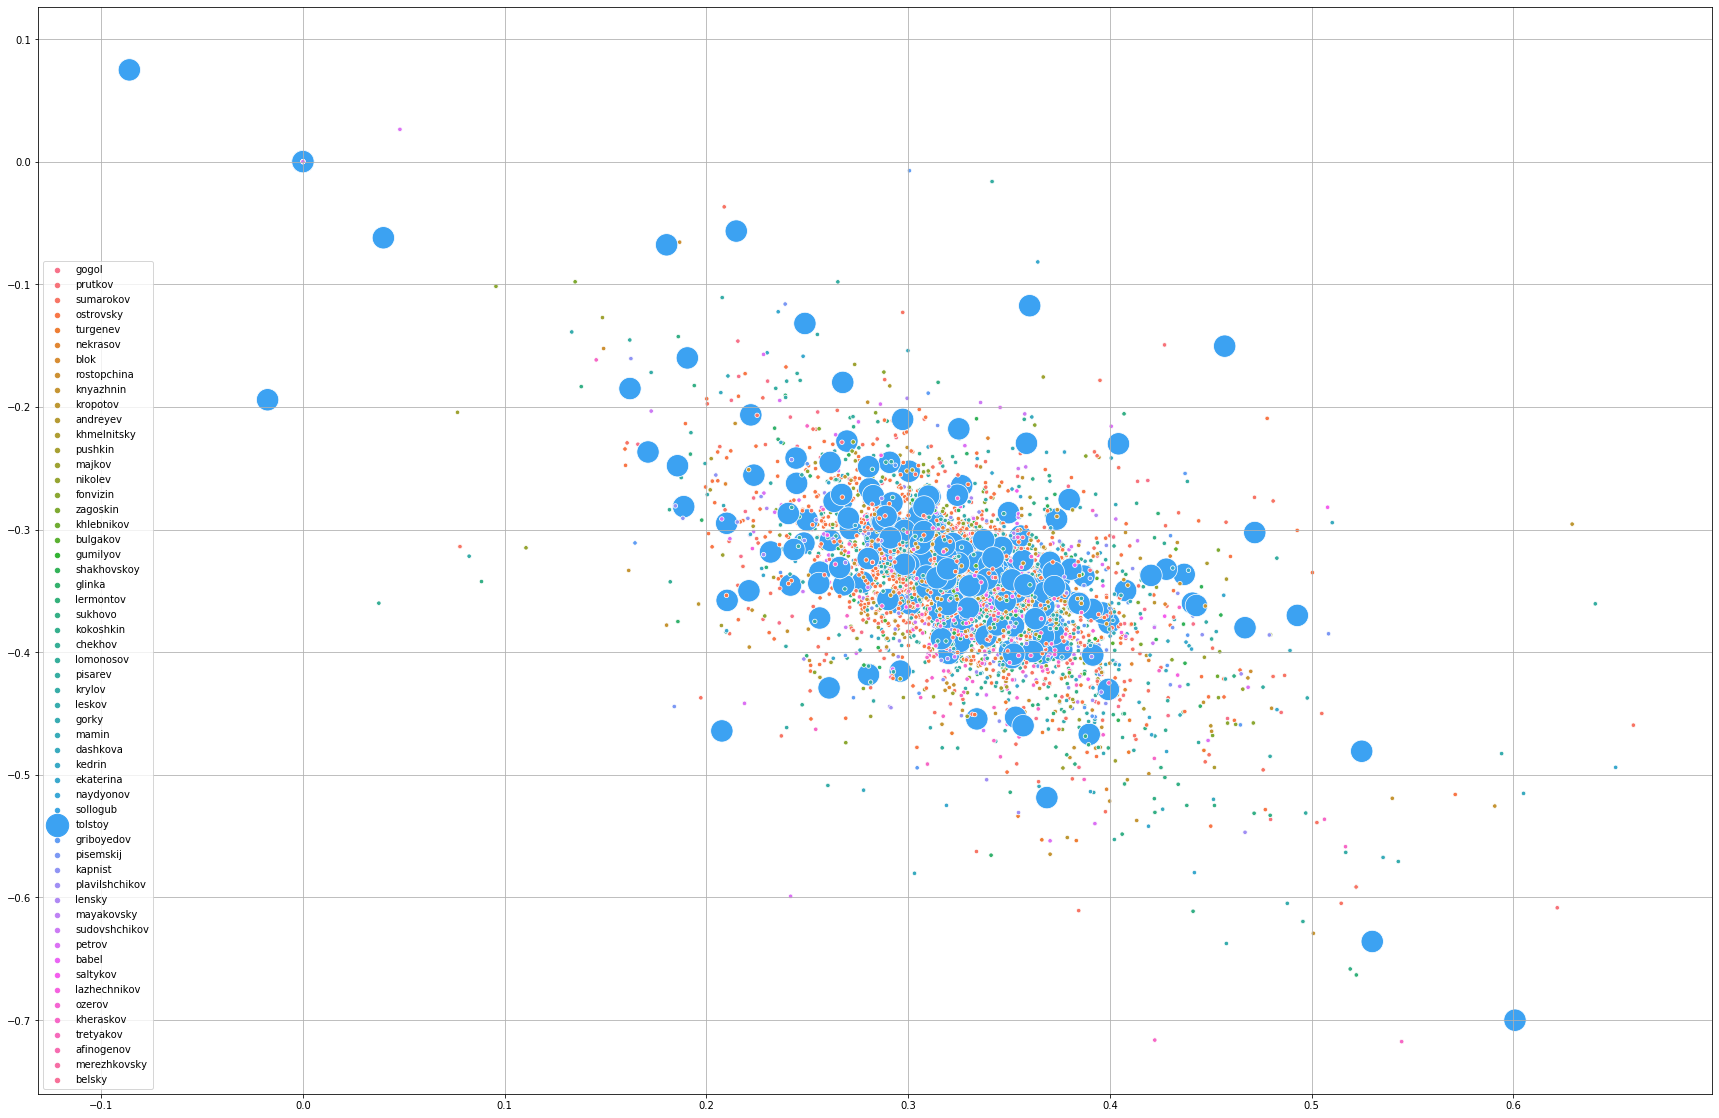

In [663]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
# plt.xlim(0.6, 1.2)
# plt.ylim(-1.6, -0.8)

# authors_sizes = {author: 20 for author in authors}
# authors_sizes['tolstoy'] = 500

sns.scatterplot(x=[x for x, y in drama2vec],
                y=[y for x, y in drama2vec],
                hue=authors,
                size=authors,
                sizes=authors_sizes)

plt.grid()

In [411]:
parsed_text, clusters1 = cluster_text(dramas_texts[4][3], model, clust_model_kmeans, cluster_names)

for person, rep in parsed_text:
    print(person)
    for phrase in rep:
        print(phrase + ': ' + colored(rep[phrase], 'red'))
    print('\n')

Трувор
Начто, дражайшая, ты прочь отсель бежишь?: 48 Описание действия
Иль больше уж во мне ты Трувора не зришь?..: 29 Эмоциональное восклицание


Ильмена
Должна повинну быть родительской я власти.: 168 О себе


Гостомысл
Для утоления мучительныя страсти.: 2 Эмоциональное восклицание


Трувор
Дай зренью моему насытиться теперь!: 3 Эмоциональное восклицание
В сей день пойдет во храм твоя прекрасна дщерь И тамо присягнет навек меня оставить...: 138 Царь/ устаревший русский язык


Ильмена
В сей день!: 159 Время (час/день)


Гостомысл
Ничто тебя не может уж избавить От крайности, куда тя должность привела.: 30 Преступления/брак/быт


Ильмена
На что, судьбина, ты Ильмене жизнь дала!: 26 Грустное восклицание о жизни


Трувор
В безмерной ярости Синав меня злословит, Мне ссылку, а себе в сей день он брак готовит.: 32 Деньги/статус
Уже во граде всем известен сей приказ, А я уж навсегда твоих лишаюсь глаз!: 39 О себе


Гостомысл
Не огорчай еще его ты части лютой!: 93 Обращение/вопрос к человеку 

In [410]:
parsed_text, clusters2 = cluster_text(dramas_texts[159][14], model, clust_model_kmeans, cluster_names)

for person, rep in parsed_text:
    print(person)
    for phrase in rep:
        print(phrase + ': ' + colored(rep[phrase], 'red'))
    print('\n')

Бренский
Или ничто тебя не может убедить?: 29 Эмоциональное восклицание


Димитрий
О, Бренский, ты вотще мне будешь говорить!: 44 О том разговоре (говорить/сказать)
Нет, после слышанных в сей день речей угрозных Я не могу принять ничьих советов поздных.: 32 Деньги/статус
Но, осуждая прав, или страсть мою виня, Оставить можешь ты в погибели меня.: 32 Деньги/статус
Иди, умножь число крамольная дружины И дай в бою искать сужденной мне кончины!: 32 Деньги/статус


Бренский
Советов, государь, не стану повторять; Что дружба нежная тебе могла сказать, Вражда и гнев князей язвительно сказали И пропасть, под тобой лежащу, указали.: 59 Рассуждения
Но где советами скучают наконец, Там скромный друг молчит, не так, как подлый, льстец, Который свой кумир в несчастье оставляет, Но так, как друга тень, с ним вместе погибает.: 59 Рассуждения
Стремишься ты на смерть: и я стремлюсь с тобой И часть мою с твоей не разлучу судьбой.: 39 О себе


Димитрий
Приди в объятия, о, сердца друг надежный, Во счастьи 

In [648]:
clust_to_vec_list = [embs[str(clust)] for clust in range(500)]

# cos_dis_clust = pairwise_distances(clust_to_vec_list, clust_to_vec_list, metric='cosine')
# dis_dict = {'{} {}'.format(cluster_names[i], i): dis for i, dis in enumerate(cos_dis_clust[66])}
# {k: v for k, v in sorted(dis_dict.items(), key=lambda item: item[1])}

In [ ]:
clusters_transmission_graph = nx.Graph()

for cluster_vec in tqdm(cluster_vecs):
    if len(cluster_vec) >=2:
        for i in range(len(cluster_vec) - 1):
            left_clust = cluster_vec[i]
            right_clust = cluster_vec[i + 1]
            if clusters_transmission_graph.has_edge(left_clust, right_clust):
                clusters_transmission_graph[left_clust][right_clust]['weight'] += 1
            else:
                clusters_transmission_graph.add_edge(left_clust, right_clust, weight=1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
pos = nx.spring_layout(clusters_transmission_graph)
nx.draw(clusters_transmission_graph, pos)
nx.draw_networkx_edges(clusters_transmission_graph, pos)
# nx.draw_networkx_labels(clusters_transmission_graph, pos, cluster_names, font_size=16)

print('done')

In [ ]:
node2vec = Node2Vec(clusters_transmission_graph, dimensions=2, walk_length=5, num_walks=5, workers=10)
embs = node2vec.fit(window=1, min_count=2)

In [ ]:
embs.most_similar('1')

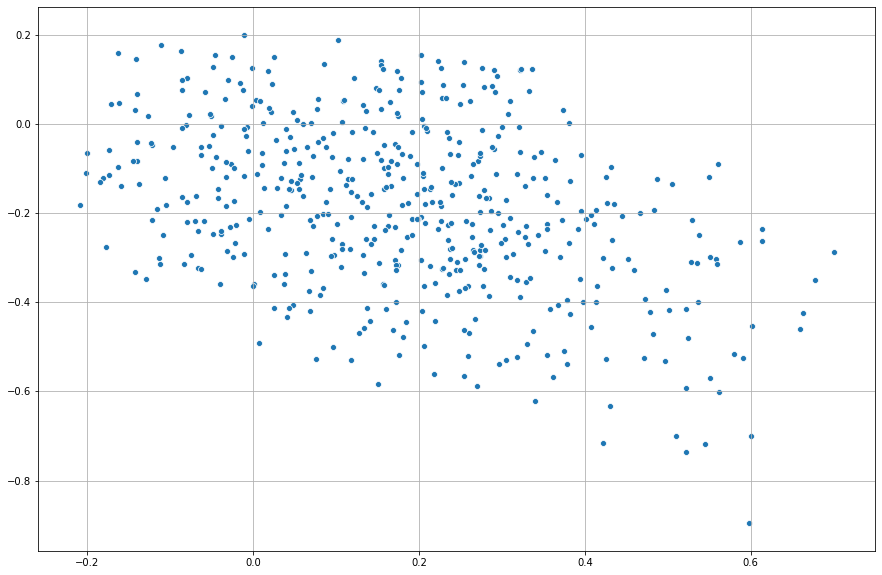

In [649]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

sns.scatterplot(x=[x for x, y in clust_to_vec_list],
                y=[y for x, y in clust_to_vec_list])

plt.grid()

In [647]:
embs['250']

array([ 0.1499286 , -0.06608308], dtype=float32)